<a href="https://colab.research.google.com/github/igor531205/PPE/blob/main/PPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Выполнил Пушкарев Игорь Игоревич. Группа 23.М08-мм.***

### Практическая работа по обнаружению средств индивидуальной защиты в промышленности с использованием компьютерного зрения.

---

*Установим Ultralytics.*

In [ ]:
!pip install -U -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.4/778.4 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 48.0 MB/s eta 0:00:00


*Подключим Google Drive.*

In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow

# Mount Google Drive.
drive.mount('/content/drive')

Mounted at /content/drive


*Загрузим пред обученную модель YOLOv8.*

In [ ]:
from ultralytics import YOLO

# Download pretrained model YOLO.
model_path = 'yolov8x.pt'
model = YOLO(model=model_path, task='detect')

100%|██████████| 131M/131M [00:00<00:00, 441MB/s] 


*Посмотрим архитектуру модели YOLOv8.*

In [ ]:
model.model

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 80, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(400, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
    

Архитектура модели YOLOv8:

*   Backbone - с 0 по 9 слой;
*   Neck - с 10 по 21 слой;
*   Head - 22 слой.

*Настроим гиперпараметры.*

In [ ]:
epochs = 50 # Total number of training epochs.
batch = -1 # Batch size for training.
imgsz = 640 # Target image size for training.
cache = True # Enables caching of dataset images in memory.
device = 0 # Specifies the computational device(s) for training.
optimizer = 'AdamW' # Choice of optimizer for training.
freeze = 10 # Freezes the first N layers of the model.
lr0=3e-04 # Initial learning rate.
lrf=1e-03 # Final learning rate = (lr0 * lrf).

*Дообучим модель YOLO используя Transfer learning (Freeze Backbone).*

In [ ]:
# Fine-tuning model YOLO.
path_dataset = '/content/drive/MyDrive/yolo/dataset/dataset.yaml'
results = model.train(data=path_dataset,
                      epochs=epochs,
                      cache=cache,
                      batch=batch,
                      device=device,
                      freeze=freeze,
                      imgsz=imgsz,
                      optimizer=optimizer,
                      lr0=lr0,
                      lrf=lrf
                      )

Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/drive/MyDrive/yolo/dataset/dataset.yaml, epochs=50, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 90.3MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 278MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.58G reserved, 0.56G allocated, 13.61G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    68165127       258.2         1.017         55.28         61.74        (1, 3, 640, 640)                    list
    68165127       516.4         1.223         51.48         40.62        (2, 3, 640, 640)                    list
    68165127        1033         1.713         87.44         53.14        (4, 3, 640, 640)                    list
    68165127        2065         2.642         181.4         80.46        (8, 3, 640, 640)                    list
    68165127        4131         4.972         338.6         149.4       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 28 for CUDA:0 9.20G/14.75G (62%) ✅


train: Scanning /content/drive/MyDrive/yolo/dataset/labels/train.cache... 376 images, 0 backgrounds, 0 corrupt: 100%|██████████| 376/376 [00:00<?, ?it/s]
train: Caching images (0.2GB RAM): 100%|██████████| 376/376 [00:16<00:00, 22.66it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/yolo/dataset/labels/valid.cache... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<?, ?it/s]
val: Caching images (0.0GB RAM): 100%|██████████| 47/47 [00:30<00:00,  1.56it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.0003, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0004375), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.92G       1.15      3.144      1.115        112        640: 100%|██████████| 14/14 [00:19<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]

                   all         47        379      0.923      0.237      0.314       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.97G     0.8917     0.9032     0.9731        126        640: 100%|██████████| 14/14 [00:17<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         47        379      0.688      0.458      0.567      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.66G     0.7965     0.5892     0.9365        135        640: 100%|██████████| 14/14 [00:17<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         47        379      0.733      0.666      0.651      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.88G     0.7525     0.5192     0.9226        152        640: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         47        379      0.833      0.631       0.69        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.95G     0.7228      0.502     0.9005        153        640: 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all         47        379      0.809      0.669      0.717      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.93G     0.6929     0.4758     0.8994        140        640: 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         47        379      0.849      0.654      0.726      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.94G     0.7149     0.4706     0.9004        159        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         47        379      0.719      0.694      0.736      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.94G     0.7142     0.4782     0.9079        100        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         47        379      0.798      0.614      0.714      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.03G     0.6835     0.4547      0.897        157        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         47        379      0.794      0.613      0.744       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.95G     0.6711     0.4366     0.8875         98        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         47        379      0.872      0.714      0.757      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.99G     0.6608     0.4272     0.8835        129        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         47        379      0.746      0.726      0.751      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.85G     0.6522     0.4241     0.8795        154        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         47        379      0.701      0.743       0.77      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.91G     0.6354     0.4085     0.8705        126        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         47        379      0.806      0.755      0.792      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       8.9G      0.642     0.4028     0.8753        146        640: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         47        379      0.811      0.733      0.785      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.86G      0.605       0.38     0.8727         89        640: 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         47        379      0.819      0.776      0.802      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.84G     0.6045     0.3715     0.8635        126        640: 100%|██████████| 14/14 [00:19<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         47        379      0.801      0.781      0.801      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.92G     0.5978     0.3763      0.858        135        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         47        379      0.834      0.763      0.809      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.82G     0.6059     0.3777     0.8603        178        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         47        379      0.865      0.764      0.802      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.81G     0.5844     0.3561     0.8601        162        640: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         47        379      0.856      0.757      0.812       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.94G     0.5789     0.3517      0.862        131        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         47        379      0.843      0.783       0.83      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.83G     0.5902     0.3604     0.8615        140        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         47        379       0.81      0.825      0.828       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.91G      0.574     0.3485     0.8502        171        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         47        379       0.86      0.787      0.825      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.86G     0.5482     0.3464     0.8467        155        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         47        379      0.807      0.796      0.819      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.94G     0.5613     0.3489     0.8575        143        640: 100%|██████████| 14/14 [00:17<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         47        379      0.794      0.825      0.825      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.91G     0.5482     0.3368     0.8441        176        640: 100%|██████████| 14/14 [00:18<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         47        379      0.871      0.777      0.826      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.03G      0.564     0.3386     0.8489        146        640: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         47        379      0.889       0.79      0.831       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.91G     0.5252     0.3253      0.839        114        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         47        379       0.84      0.793      0.827       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.93G     0.5226      0.319     0.8411        131        640: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         47        379      0.821      0.812      0.829      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.93G     0.5267     0.3202     0.8448        128        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         47        379       0.87      0.808      0.826      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.01G      0.531     0.3245     0.8534        123        640: 100%|██████████| 14/14 [00:17<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         47        379      0.843      0.798      0.815      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.86G     0.5129     0.3141     0.8428        160        640: 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         47        379      0.841      0.807      0.824       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.95G     0.4925     0.2995     0.8367        108        640: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         47        379       0.83      0.817      0.834      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.95G     0.5086     0.3075     0.8357        125        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         47        379      0.821      0.803      0.828      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.81G     0.4979     0.3044     0.8351        123        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         47        379      0.819      0.821      0.823      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.93G     0.4933     0.2979     0.8422         92        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         47        379      0.844      0.808      0.824      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.82G       0.49     0.3005     0.8364        164        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         47        379      0.846      0.827      0.827      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.82G     0.4714     0.2885     0.8334        165        640: 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         47        379      0.849      0.845      0.836      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.83G     0.4885     0.2942     0.8301        121        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         47        379      0.851      0.842      0.841       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.85G     0.4841     0.2934     0.8229        169        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         47        379      0.861      0.822      0.832      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.94G     0.4755     0.2854     0.8339        161        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         47        379      0.851      0.841      0.833      0.621


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.85G     0.5421     0.3084     0.8289         99        640: 100%|██████████| 14/14 [00:20<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         47        379      0.841      0.836      0.842      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.82G     0.5367     0.2997      0.833         80        640: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         47        379      0.862      0.831      0.835      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.81G     0.5318     0.3001     0.8266         78        640: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all         47        379      0.859      0.833      0.837       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.88G     0.5342     0.2963     0.8338         79        640: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         47        379      0.864      0.817      0.831      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.81G     0.5073     0.2831     0.8184         77        640: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         47        379      0.895      0.807      0.838      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.79G      0.496     0.2785     0.8149         66        640: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         47        379      0.881      0.804      0.835       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.86G     0.5008     0.2786     0.8213         98        640: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         47        379      0.889      0.806      0.837      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       8.8G     0.4902     0.2734     0.8149         85        640: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         47        379      0.847      0.818      0.834      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       8.8G     0.4944      0.279     0.8144         90        640: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         47        379      0.838      0.821      0.835       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.85G     0.4877     0.2757     0.8126         92        640: 100%|██████████| 14/14 [00:17<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         47        379      0.862      0.801      0.836      0.631



50 epochs completed in 0.298 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68136087 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


                   all         47        379      0.861      0.801      0.836      0.631
                Person         47         89      0.996          1      0.995      0.864
                  MEWP         47         43      0.984          1      0.995      0.976
              Forklift         47         35      0.974          1      0.995      0.988
                  Vest         47         22      0.881      0.818      0.892      0.539
                Helmet         47         54      0.915      0.926      0.965      0.614
                 Boots         47         56      0.642        0.5      0.622      0.226
               Harness         47         20      0.937        0.7      0.789      0.497
                  Cone         47         52      0.979      0.904      0.958      0.593
                Gloves         47          6        0.3      0.167      0.153      0.116
               Freight         47          2          1          1      0.995      0.895
Speed: 0.1ms preproce

*Выведим метрики, полученные при обучении и валидации.*

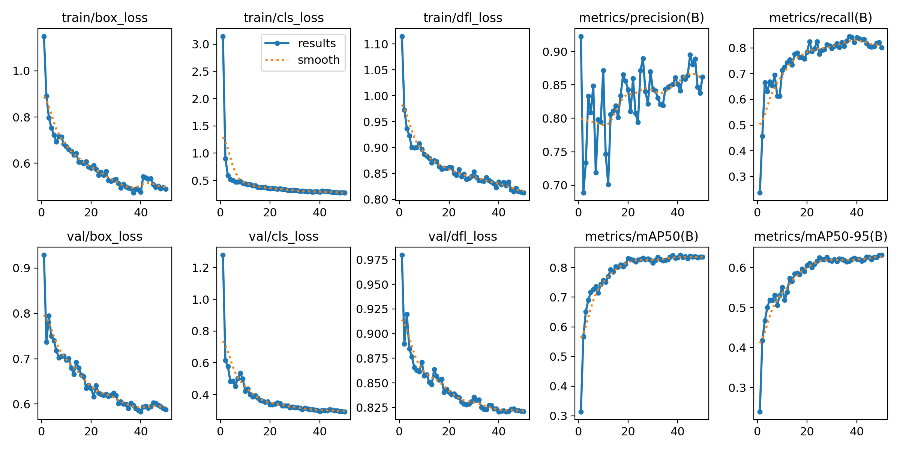

In [ ]:
# Output of results.
img = cv2.imread('runs/detect/train/results.png')
img = cv2.resize(img, (900, 450))
cv2_imshow(img)

box_loss. Потери на обучающем и валидационном наборе для координат ограничивающих рамок (bounding boxes).

cls_loss. Потери на обучающем и валидационном наборе для классификации объектов.

dfl_loss. Потери на обучающем и валидационном наборе для распределенной вероятности рамок (distributional focal loss).

Потери на обучающем наборе уменьшаются, что является признаком хорошей сходимости модели. А уменьшение потерь на валидационном наборе указывает на отсутствие переобучения.

metrics/precision(B). Метрика точности (precision) модели на валидационном наборе. Показывает колебания, но в целом модель правильно идентифицирует объекты среди тех, которые она обнаруживает.

metrics/recall(B). Метрика полноты (recall) модели на валидационном наборе. Показывает увеличение, модель находит большинство объектов.

metrics/mAP50(B). Средняя точность при 50% пороге (mean Average Precision at IoU 50%) на валидационном наборе.

metrics/mAP50-95(B). Средняя точность при различных порогах от 50% до 95% (mean Average Precision at IoU 50 to 95%) на валидационном наборе.

Метрики mAP увеличиваются, что показывает улучшение производительности модели и точности при различных порогах IoU.


*Выведим кривые зависимости метрик, полученные при обучении и валидации.*

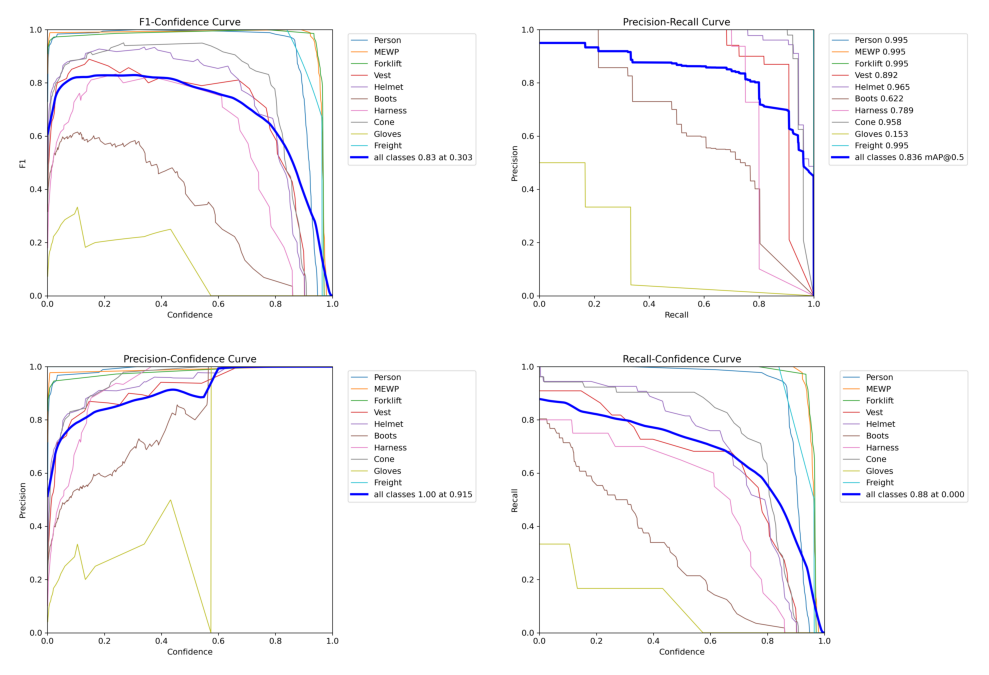

In [ ]:
# Create paths to results.
image_paths = ['runs/detect/train/F1_curve.png',
               'runs/detect/train/PR_curve.png',
               'runs/detect/train/P_curve.png',
               'runs/detect/train/R_curve.png',
               ]

# Create a grid to display results.
n_rows = int(len(image_paths) / 2)
n_cols = 2
plt.figure(figsize=(10, 7))

# Output of results.
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img)
        plt.axis('off')

plt.tight_layout()
plt.show()

F1-Confidence Curve. F1 мера учитывает как точность (precision), так и полноту (recall). Для каждого класса отображается своя кривая, а также агрегированное значение для всех классов. Видно, что для большинства классов F1 мера высока, что говорит о хорошей сбалансированности между точностью и полнотой.

Precision-Recall Curve. Кривая зависимости точности (precision) от полноты (recall). Эта кривая показывает, насколько хорошо модель распознает все объекты (полнота) при различных уровнях точности. Чем больше площадь под кривой (AUC), тем лучше модель. Видно, что для некоторых классов показатели очень высоки.

Precision-Confidence Curve. Кривая зависимости точности (precision) от уровня уверенности (confidence). Чем выше уверенность модели, тем выше точность.

Recall-Confidence Curve. Кривая зависимости полноты (recall) от уровня уверенности (confidence). Чем выше уверенность, тем ниже полнота, так как модель становится более избирательной и может пропускать некоторые объекты.

В целом модель демонстрирует хорошую производительность.


*Произведем детекцию СИЗ и спец.техники на валидационной выборке.*

In [ ]:
# Use a trained model to run predictions on images.
results = model('/content/drive/MyDrive/yolo/dataset/images/valid')


image 1/47 /content/drive/MyDrive/yolo/dataset/images/valid/60_02_05_2024_10_11_10.jpg: 384x640 2 Persons, 2 MEWPs, 1 Helmet, 1 Harness, 4 Cones, 135.9ms
image 2/47 /content/drive/MyDrive/yolo/dataset/images/valid/60_02_05_2024_11_51_38.jpg: 384x640 1 Person, 2 MEWPs, 1 Helmet, 3 Cones, 49.1ms
image 3/47 /content/drive/MyDrive/yolo/dataset/images/valid/60_05_03_2024_09_40_37.jpg: 384x640 3 Persons, 1 MEWP, 1 Forklift, 1 Vest, 1 Helmet, 2 Bootss, 1 Harness, 1 Cone, 49.2ms
image 4/47 /content/drive/MyDrive/yolo/dataset/images/valid/60_05_03_2024_09_40_51.jpg: 384x640 2 Persons, 1 MEWP, 1 Forklift, 1 Vest, 1 Helmet, 2 Cones, 44.9ms
image 5/47 /content/drive/MyDrive/yolo/dataset/images/valid/60_05_03_2024_09_41_07.jpg: 384x640 4 Persons, 1 MEWP, 1 Forklift, 1 Helmet, 3 Bootss, 1 Harness, 2 Cones, 35.7ms
image 6/47 /content/drive/MyDrive/yolo/dataset/images/valid/60_05_03_2024_09_41_16.jpg: 384x640 3 Persons, 1 MEWP, 1 Forklift, 2 Vests, 1 Helmet, 1 Harness, 2 Cones, 35.7ms
image 7/47 /con

*Сохраним результаты на диске.*

In [ ]:
results_count = len(results)

# Save results to files.
for num, result in enumerate(results):
    filename = f'result_foto_{num}.jpg'
    result.save(filename=filename)

*Выведем результаты работы модели из первых 6 файлов.*

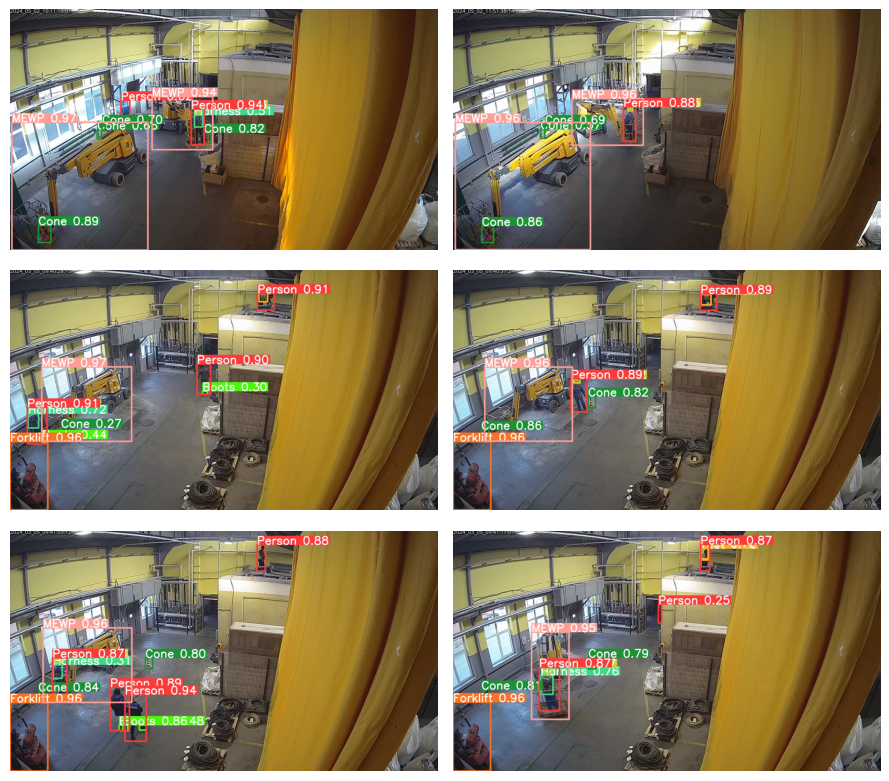

In [ ]:
import cv2
import matplotlib.pyplot as plt

results_count = 6

# Create paths to images.
image_paths = [f'result_foto_{i}.jpg' for i in range(results_count)]

# Create a grid to display results.
n_cols = 2
n_rows = (len(image_paths) + n_cols - 1) // n_cols
plt.figure(figsize=(9, 8))

# Output of results.
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img)
        plt.axis('off')

if results_count % n_cols != 0:
    for j in range(n_cols - (results_count % n_cols)):
        plt.subplot(n_rows, n_cols, results_count + j + 1)
        plt.axis('off')

plt.tight_layout()
plt.show()

*Выведем результаты работы модели из еще 6 файлов.*

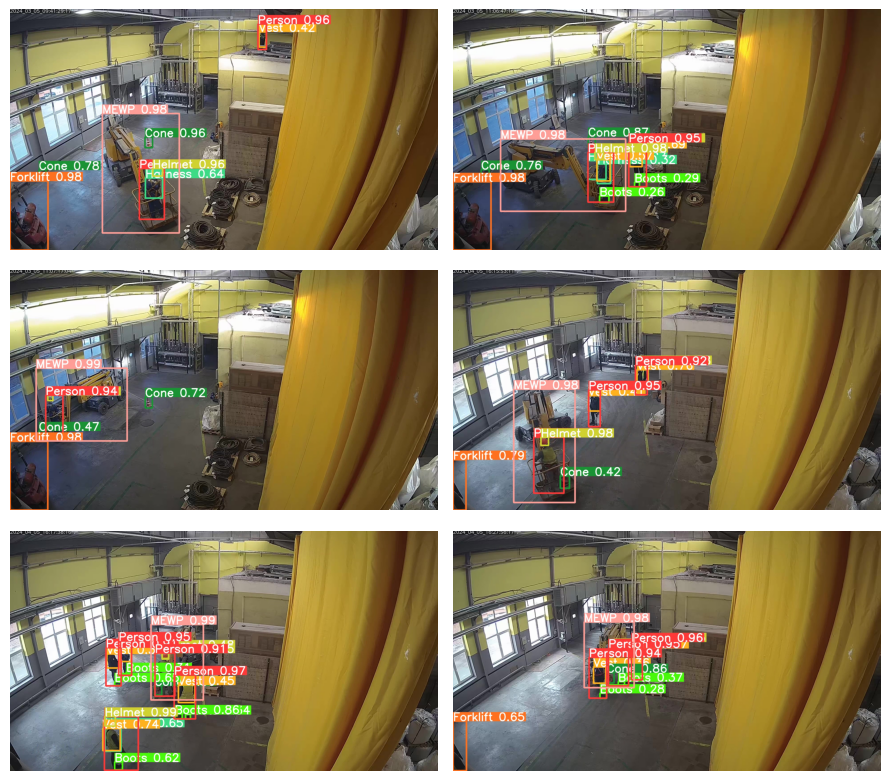

In [ ]:
# Create paths to images.
image_paths = [f'result_foto_{i}.jpg' for i in range(6, 12)]

# Create a grid to display results.
n_cols = 2
n_rows = (len(image_paths) + n_cols - 1) // n_cols
plt.figure(figsize=(9, 8))

# Output of results.
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img)
        plt.axis('off')

if results_count % n_cols != 0:
    for j in range(n_cols - (results_count % n_cols)):
        plt.subplot(n_rows, n_cols, results_count + j + 1)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Unmount Google Drive
drive.flush_and_unmount()

В целом модель справляется с задачей детекции СИЗ в производственных условиях. Для повышения производительности модели необходим сбор и аннотация большего количества изображений.